<a href="https://colab.research.google.com/github/artbbs/42SP-arfernan/blob/main/IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#ENGENHARIA DE ATRIBUTOS

import scipy.stats as stats #coletar estatísticas
import numpy as np # computação científica
import pandas as pd # processamento de dados
import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados

In [68]:
#lê e carrega os dados em memoria
url_dados = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
colunas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
           'marital-status', 'occupation', 'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income']
dados = pd.read_csv(url_dados, header=None, sep=',', na_values=[' ?', '?', '? '],
                    names=colunas)

In [ ]:
#Exibe as primeiras linhas do conjunto de dados
dados.head()

In [ ]:
#Exibe informações sobre conjunto de dados carregado
#Observamos: volume de dados, nome das colunas, tipode de dados e dados faltando
dados.info()

In [71]:
#ELIMINACAO DE ATRIBUTOS
#Remove o atributo 'fnlwgt'
dados.drop('fnlwgt', axis=1, inplace=True)
#remove o atributo 'relationship'
dados2 = dados.drop('relationship', axis=1, inplace=False)

In [ ]:
dados.head()

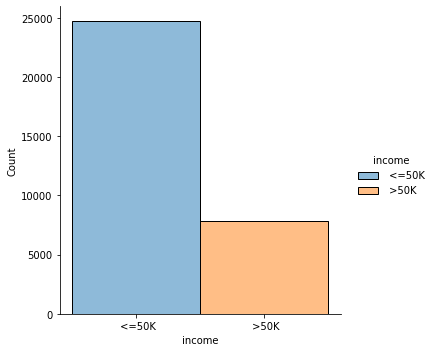

In [73]:
#Plota a dristribuição de classes
sns.displot(dados, x="income", hue="income")
plt.show()

In [74]:
#Divide o conjunto de dados pelas duas classes
class_menor50 = dados[dados['income'] == ' <=50K']
class_maior50 = dados[dados['income'] == ' >50K']
#Exibe a quantidade de dados por classe
print("<=50K:", len(class_menor50))
print(">50K :", len(class_maior50))

<=50K: 24720
>50K : 7841


In [ ]:
#Equilibra a classe majoritária (<=50)
#conforme o tamanho da classe minoritária (>50)
nova_class_menor50 = class_menor50.sample(len(class_maior50))
novos_dados = pd.concat([nova_class_menor50, class_maior50], axis=0)
novos_dados.head()

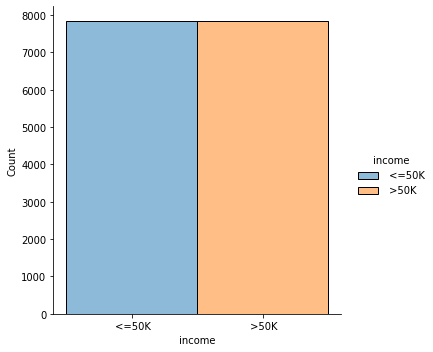

In [76]:
#Plota a nova distribuição de classes
sns.displot(novos_dados, x="income", hue="income")
plt.show()

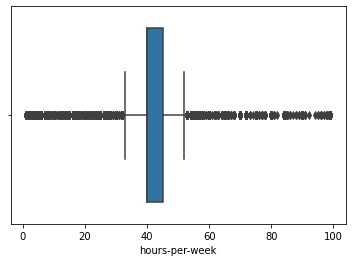

In [77]:
#TRATAMENTO DE DADOS RUIDOSOS
#Identificando ruído no atributo 'hours-per-week'
sns.boxplot(data=dados, x="hours-per-week")
plt.show()

In [78]:
#Identifica os objetos ruidosos no conjunto de dados
x = stats.zscore(dados['hours-per-week'])
print("Ruídos: ", len(dados[np.abs(x) > 3]))

Ruídos:  440


In [79]:
#Substitui o valor ruidoso pelo valor médio do atributo
dados.loc[np.abs(x) > 3, 'hours-per-week'] = int(np.mean(dados['hours-per-week']))

In [ ]:
#Transforma os valores nominais do atributo binário 'income' em valores numéricos
dados['income-num'] = dados['income'].map({" <=50K": 0, " >50K": 1})
dados.head(10)

In [ ]:
#Transforma os valores nominais do atributo binário 'iracencome' em valores numérico
trans_dados = pd.get_dummies(dados[['race']])
trans_dados = pd.concat([dados['race'], trans_dados], axis=1)
trans_dados.head()

In [ ]:
#Transforma os valores numéricos do atributo 'education-num' em valores nominais
dados['education-num-nominal'] = dados['education-num'].map(
                            {1:'Preschool',
                             2: '1st-4th',
                             3: '5th-6th',
                             4: '7th-8th',
                             5: '9th',
                             6: '10th',
                             7: '11th',
                             8: '12th',
                             9: 'HS-grad',
                            10: 'Some-college',
                            11: 'Assoc-voc',
                            12: 'Assoc-acdm',
                            13: 'Bachelors',
                            14: 'Masters',
                            15: 'Prof-school',
                            16: 'Dostorate'})
dados[['education', 'education-num', 'education-num-nominal']].head()

In [83]:
#biblioteca Featuretools  -  automatizar a engenharia de atributos
# - Open source
# - Pode usar junto com o pandas
# - Atributos significantes em pouco tempo.

In [ ]:
#TÉCNICAS DE REAMOSTRAGEM

In [84]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression #modelo de regressao
from sklearn.metrics import accuracy_score #acurácia
from sklearn.model_selection import train_test_split #amostragem holdout
from sklearn.model_selection import KFold #amostragem validação cruzada

In [85]:
#Carrega os dados em memória e
#Separa os dados em entrada e saída (x, y)
wine = datasets.load_wine()
x = wine.data
y = wine.target

In [86]:
print("# linhas : ", x.shape[0])
print("# colunas: ", x.shape[1])
print("# classes: ", len(np.unique(y)))

# linhas :  178
# colunas:  13
# classes:  3


In [87]:
#separa a entrada/saída em subconjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [88]:
print("Treinamento (60%): ", len(x_train))
print("      Teste (40%): ", len(x_test))

Treinamento (60%):  106
      Teste (40%):  72


In [89]:
#Realiza a aprendizagem sobre o subconjunto de treinamento
clf = LogisticRegression(solver='liblinear')
clf.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [90]:
#Classifica os dados não-vists no subconjunto de teste
y_pred = clf.predict(x_test)

In [91]:
#Compara resultado reais e preditos
print("Acurácia: %.2f" % accuracy_score(y_test, y_pred))

Acurácia: 0.93


In [92]:
acc = []

#Realiza a aprendizagem por validação cruzada
Kf = KFold(n_splits=5)

for train_index, test_index in Kf.split(x):
  #Constroi os subconjuntos de treinamento/teste para cada partição
  x_train, y_train = x[train_index], y[train_index]
  x_test, y_test = x[test_index], y[test_index]

  #Realiza a aprendizagem sobre o conjunto de treinamento
  #clf = DummyClassifier(strategy="prior", random_state=42)
  clf = LogisticRegression(solver='liblinear')
  clf.fit(x_train, y_train)

  #Classidica os dados não-vistos no subconjunto
  y_pred = clf.predict(x_test)

  #Calcula e armazena a acurácia do modelo atual
  acc.append(accuracy_score(y_test, y_test))

In [93]:
print("Acurácia: %.2f +- %.2f" % (np.mean(acc), np.std(acc)))

Acurácia: 1.00 +- 0.00


In [94]:
#Estratégias de Otimização

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression #Regressão logística
from sklearn.metrics import accuracy_score #Técnica de Acurácia
from sklearn.model_selection import GridSearchCV #Classe Grid...
from sklearn.model_selection import RandomizedSearchCV #Classe Rando...

In [95]:
#DADOS EXPERIMENTAIS
#Carrega os dados em memória e
#Separa os dados em entrada (X) e saída (y)
breast = datasets.load_breast_cancer()
X = breast.data
y = breast.target

In [96]:
print("#Linhas  :", X.shape[0])
print("#Colunas :", X.shape[1])
print("#Classes :", len(np.unique(y)))

#Linhas  : 569
#Colunas : 30
#Classes : 2


In [97]:
logreg = LogisticRegression(random_state=42, n_jobs=-1)

In [45]:
#BUSCA EM GRADE

In [126]:
#Define os hiperparâmetros do algoritimo
parametros = {
    'penalty': ['l2'], #['l1', 'l2'],
    'C': [0.25, 0.5, 0.75, 1.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [127]:
#Prepara a busca em grade
#Utilizando a validação cruzada com 10 particoes
clf = GridSearchCV(estimator=logreg,
                   param_grid=parametros,
                   scoring=['accuracy', 'average_precision'],
                   refit='accuracy',
                   cv=10,
                   verbose=2,
                   n_jobs=-1)

In [128]:
#Ajusta o modelo aos dados
clf.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1.0], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             refit='accuracy', scoring=['accuracy', 'average_precision'],
             verbose=2)

In [129]:
clf.best_estimator_

LogisticRegression(C=0.75, n_jobs=-1, random_state=42, solver='newton-cg')

In [130]:
#Exibe o melhor resultado
print("Acurácia: %.2f" % clf.best_score_)

Acurácia: 0.96


In [122]:
#BUSCA ALEATORIA

In [131]:
clf = RandomizedSearchCV(estimator=logreg,
                         param_distributions=parametros,
                         n_iter=10,
                         scoring=['accuracy', 'average_precision'],
                         refit='accuracy',
                         verbose=2,
                         n_jobs=-1)

In [132]:
#Ajusta modelo aos dados
clf.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


RandomizedSearchCV(estimator=LogisticRegression(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   refit='accuracy', scoring=['accuracy', 'average_precision'],
                   verbose=2)

In [133]:
#Exibe os hiperparâmetros do melhor modelo constuído
clf.best_estimator_

LogisticRegression(n_jobs=-1, random_state=42, solver='liblinear')

In [135]:
#Exibe o melhor resultado 
print("Acurácia: %.2f" % clf.best_score_)
print("Acurácia: %.2f" % clf.best_score_)

Acurácia: 0.95
Acurácia: 0.95
